In [49]:
import numpy as np
import pandas as pd
import random
from typing import List, Tuple
from IPython.display import Image
import tokenize_uk

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [4]:
from collocations.collocation_extractor import StanfordNLPCollocationExtractor

In [5]:
from enum import IntEnum
class Category(IntEnum):
    STAFF = 0,
    FACILITIES = 1, 
    CLEANLINESS = 2, 
    COMFORT = 3,
    VALUE_FOR_MONEY = 4,
    LOCATION = 5,
    NOISE = 6,
    WIFI = 7,
    OTHERS = 8

class SentimentType(IntEnum):
    NEGATIVE = 0, 
    NEUTRAL = 1,
    POSITIVE = 2

In [125]:
class StubModel:
    
    RANDOM_NUM = 10
    
    def __init__(self, df):
        self.df = df
        self.collocation_extractor = StanfordNLPCollocationExtractor()
    
    def acquire_collocations_for_hotel(self, hotel_name) -> List[str]:
        hotel_df = self.df.loc[ self.df['hotel'] == hotel_name]
        
        if len(hotel_df) == 0:
            return []
        
        title_list = random.sample(set(self.df['title'].values), self.RANDOM_NUM)
        pos_list = random.sample(set(self.df['pos_text'].values), self.RANDOM_NUM)
        neg_list = random.sample(set(self.df['neg_text'].values), self.RANDOM_NUM)
        
        collocations = self.collocation_extractor.extract_from_list_of_text(title_list + pos_list + neg_list)
        
        return collocations
    
    def cluster_collocations(self, collocations: List[str], k: int):
        random.shuffle(collocations)
        size = len(collocations)
        assert size > k
        n = size // k
        start = 0
        result = []
        for i in range(0, k):
            item = collocations[start: start+n]
            result.append(item)
            
            start += n
            
        return result
    
    
    def detect_cluster_category(self, clusters: List[List[Tuple[str, str]]]) -> List[Category]:
        size = len(clusters)
        
        return random.choices(list(Category), k = size)
    
    def detect_sentiment_of_category(self, category_collocations: List[str], category: Category) -> SentimentType:
        return random.choice(list(SentimentType))
    
    def detect_sentiments_of_categories(self, category_collocations_list: List[List[str]], categories: List[Category]):
        assert len(category_collocations_list) == len(categories)
        
        result = []
        for i in range(0, len(categories)):
            sentiment = self.detect_sentiment_of_category(category_collocations_list[i], categories[i])
            result.append(sentiment)
            
        return result
    
    
    
    def generate_summary_for_hotel(self, hotel: str):
        k = 10
        collocations = self.acquire_collocations_for_hotel(hotel)
        clusters = self.cluster_collocations(collocations, k=k)
        categories = self.detect_cluster_category(clusters)
        sentiments = self.detect_sentiments_of_categories(clusters, categories)
        
        result = {sent: [] for sent in list(SentimentType)}
        for i in range(0, k):
            num = random.choice([1, 2, 3])
            phrases = random.choices(clusters[i], k= num)
            phrase = ""
            for j in range(0, len(phrases)):
                result[sentiments[i]].append(f"{phrases[j][0]} {phrases[j][1]}")
                                        
        return result


In [126]:
random.choices([1, 2, 3], k=2)

[2, 2]

In this project there will be several metrics at each different steps. 

##### Example of booking.com data

In [10]:
example_df = pd.read_csv('/home/dbabenko/DS/NLP/Detect-emotion-sentimental/dataset/booking/lviv-reviews.csv')

In [11]:
example_df.head()

title  \
0                    –ó–∞—Ç–∏—à–Ω–∏–π –≥–æ—Ç–µ–ª—å –≤ —Ü–µ–Ω—Ç—Ä—ñ –º—ñ—Å—Ç–∞.   
1                                    –ß—É–¥–æ–≤–∏–π –≥–æ—Ç–µ–ª—å!   
2         –•–æ—Ä–æ—à–∏–π –≥–æ—Ç–µ–ª—å –≤ —è–∫–∏–π —Ö–æ—á–µ—Ç—å—Å—è –ø–æ–≤–µ—Ä–Ω—É—Ç–∏—Å—è   
3  –ù–µ —Å—É–¥—ñ—Ç—å –ø—Ä–æ –≥–æ—Ç–µ–ª—å –ø–æ –π–æ–≥–æ –≤—Ö–æ–¥—É) Plaza - —Ü–µ...   
4               –°–º–∞—á–Ω–æ —ñ —á–∏—Å—Ç–æ, –∞–ª–µ –≤–Ω–æ—á—ñ –≥–∞–ª–∞—Å–ª–∏–≤–æ!   

                                            pos_text  \
0  –ó–∞—Ç–∏—à–Ω–∏–π –≥–æ—Ç–µ–ª—å –≤ —Ü–µ–Ω—Ç—Ä—ñ –º—ñ—Å—Ç–∞. –ü–æ—Ä—è–¥ –∑—É–ø–∏–Ω–∫–∞ ...   
1  –ß—É–¥–æ–≤–∏–π –≥–æ—Ç–µ–ª—å!!! –°–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è —Ü—ñ–Ω–∞-—è–∫—ñ—Å—Ç—å!!...   
2  –î—É–∂–µ —Ö–æ—Ä–æ—à–µ —Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –≥–æ—Ç–µ–ª—é . –°–º–∞—á–Ω–∏–π —ñ —Ä—ñ...   
3  –î—É–∂–µ –ø—Ä–∏–≤—ñ—Ç–Ω–∏–π –ø–µ—Ä—Å–æ–Ω–∞–ª, –¥–æ–≤–æ–ª—ñ –≤–µ–ª–∏–∫–∏–π –Ω–æ–º–µ—Ä ...   
4  –ì–æ—Ç–µ–ª—å —á—É–¥–æ–≤–∏–π, –ø–µ—Ä—Å–æ–Ω–∞–ª –ø—Ä–∏–≤—ñ—Ç–Ω–∏–π, —Å–Ω—ñ–¥–∞–Ω–æ–∫ —Å...   

                                            neg_text  ratingValue  bestRating  \
0                                 –í—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –ª—ñ—Ñ—Ç—É.         10.0        10.0   
1                                                Nan         10.0        10.0   
2  –ù–∞ —á–µ—Ç–≤–µ—Ä—Ç–∏–π –ø–æ–≤–µ—Ä—Ö  –±–µ–∑ –ª—ñ—Ñ—Ç–∞ –≤–∞–∂–∫—É–≤–∞—Ç–æ –ø—ñ–¥—ñ–π...          9.0        10.0   
3  –ï–∫—Å—Ç–µ—Ä'—î—Ä, –Ω—ñ–∫–æ–ª–∏ –±–∏ –Ω–µ –ø–æ–¥—É–º–∞–≤, —â–æ —á–µ—Ä–µ–∑ —Ç–∞–∫–∏...          8.8        10.0   
4  –ê–ª–µ —Å–ø–∞—Ç–∏ –Ω–µ–º–æ–∂–ª–∏–≤–æ, –±–æ –Ω—ñ—Ö—Ç–æ –Ω–µ –≤—Ç–∏—Ö–æ–º–∏—Ä—é—î —Ç—É...          7.9        10.0   

           hotel  
0  angel.uk.html  
1  angel.uk.html  
2  angel.uk.html  
3  angel.uk.html  
4  angel.uk.html

In [127]:
stub_model = StubModel(example_df)

Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_tokenizer.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_tagger.pt', 'pretrain_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu.pretrain.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_lemmatizer.pt', 'lang': 'uk', 'shorthand': 'uk_iu', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu_parser.pt', 'pretrain_path': '/home/dbabenko/stanfordnlp_resources/uk_iu_models/uk_iu

As an example of reviews data from one of the potential resources ( *booking.com* ) see above. 

### Collocations

Let's consider review comments about Blum hotel in Lviv (https://www.booking.com/hotel/ua/blum.en-gb.html?aid=318615;label=New_English_EN_ALL-GBIECAUS_5226333385-zrfE0CU6K_HWeoloJw%2APrQS217244291991%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg;sid=d7dcfa602c9b27d163fa668f6f1f1bc9;dest_id=-1045268;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1586971573;srpvid=35487a9ad1180088;type=total;ucfs=1&#tab-reviews )

In [2]:
blum_df = example_df.loc[example_df['hotel'] == 'blum.uk.html']
blum_df.head(10)

title  \
2031                                       –†–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è   
2032    –ü–µ—Ä—Å–æ–Ω–∞–ª –ø—Ä–∏–≤—ñ—Ç–Ω–∏–π, —à–≤–∏–¥–∫–æ –≤–∏—Ä—ñ—à—É—î —É—Å—ñ –ø–∏—Ç–∞–Ω–Ω—è.   
2033  –†–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è, —Å–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è —Ü—ñ–Ω–∏ —Ç–∞ —è–∫–æ—Å—Ç—ñ, —Å...   
2034                              –í—Å–µ —Å—É–ø–µ—Ä. –†–µ–∫–æ–º–µ–Ω–¥—É—é   
2035  –•–æ—Ä–æ—à–∏–π –≥–æ—Ç–µ–ª—å, —Å—Ö–æ–≤–∞–Ω–∏–π –≤—ñ–¥ —à—É–º–Ω–æ–≥–æ —Ü–µ–Ω—Ç—Ä—É, —Ç...   
2036                           –°–Ω—ñ–¥–∞–Ω–æ–∫ –Ω–µ–ø–µ—Ä–µ–≤–µ—Ä—à–µ–Ω–∏–π.   
2037             –ß—É–¥–æ–≤–µ –º—ñ—Å—Ü–µ –¥–ª—è –∫–æ—Ä–æ—Ç–∫–æ—á–∞—Å–Ω–∏—Ö –ø–æ—ó–∑–¥–æ–∫   
2038                    –ó–∞—Ç–∏—à–Ω–∏–π –≥–æ—Ç–µ–ª—å —É —Å–µ—Ä—Ü—ñ –õ—å–≤–æ–≤–∞;   
2039  –Ω–∞—Å—Ç—É–ø–Ω–æ—ó –º–∞–Ω–¥—Ä—ñ–≤–∫–∏ –¥–æ –õ—å–≤–æ–≤–∞ –æ–±–µ—Ä–µ–º–æ —Ü–µ–π –≥–æ—Ç–µ–ª—å.   
2040                  –°–Ω—ñ–¥–∞–Ω–æ–∫ - –≤–µ–ª–∏–∫—ñ –ø–æ—Ä—Ü—ñ—ó, —Å–º–∞—á–Ω–æ!   

                                               pos_text  \
2031                                       –†–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è   
2032  –ü–µ—Ä—Å–æ–Ω–∞–ª –ø—Ä–∏–≤—ñ—Ç–Ω–∏–π, —à–≤–∏–¥–∫–æ –≤–∏—Ä—ñ—à—É—î —É—Å—ñ –ø–∏—Ç–∞–Ω–Ω—è...   
2033  –†–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è, —Å–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è —Ü—ñ–Ω–∏ —Ç–∞ —è–∫–æ—Å—Ç—ñ, —Å...   
2034  –ó–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –Ω–µ –¥–∞–ª–µ–∫–æ –≤—ñ–¥ —Ü–µ–Ω—Ç—Ä—É, –±–ª–∏–∑—å–∫–æ –≤—Å—ñ ...   
2035  –•–æ—Ä–æ—à–∏–π –≥–æ—Ç–µ–ª—å, —Å—Ö–æ–≤–∞–Ω–∏–π –≤—ñ–¥ —à—É–º–Ω–æ–≥–æ —Ü–µ–Ω—Ç—Ä—É, —Ç...   
2036  –°–Ω—ñ–¥–∞–Ω–æ–∫ –Ω–µ–ø–µ—Ä–µ–≤–µ—Ä—à–µ–Ω–∏–π. –ù–µ–æ–±–º–µ–∂–µ–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å ...   
2037  –ì–∞—Ä–Ω–∏–π –¥–∏–∑–∞–π–Ω –≥–æ—Ç–µ–ª—é, —á—É–¥–æ–≤–µ —Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è, –ø—Ä–∏...   
2038  –ó–∞—Ç–∏—à–Ω–∏–π –≥–æ—Ç–µ–ª—å —É —Å–µ—Ä—Ü—ñ –õ—å–≤–æ–≤–∞; –ø—Ä–∏–≤—ñ—Ç–Ω–∏–π –Ω–µ–Ω–∞...   
2039  –í—ñ–¥–º—ñ–Ω–Ω–µ —Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –≥–æ—Ç–µ–ª—é! –î—É–∂–µ –±–ª–∏–∑—å–∫–æ –¥–æ ...   
2040  –°–Ω—ñ–¥–∞–Ω–æ–∫ - –≤–µ–ª–∏–∫—ñ –ø–æ—Ä—Ü—ñ—ó, —Å–º–∞—á–Ω–æ! 1 —Å—Ç—Ä–∞–≤–∞ –±–µ–∑...   

                                               neg_text  ratingValue  \
2031  –ë—Ä—É–¥–Ω—ñ —ñ –æ–±—à–∞—Ä–ø–∞–Ω—ñ —Å—Ç—ñ–Ω–∏ –Ω–æ–º–µ—Ä—É –î—É–∂–µ –∂–∞—Ä–∫–æ –≤ –Ω...          5.0   
2032  –û–¥–Ω—É –∑ –Ω–æ—á–µ–π —Ö—Ç–æ—Å—å –ø–æ—Å—Ç—ñ–π–Ω–æ —Ö–æ–¥–∏–≤ –ø–æ –∫–æ—Ä–∏–¥–æ—Ä—É ...          8.8   
2033  –ë—É–ª–æ –± –Ω–µ–ø–æ–≥–∞–Ω–æ –º–∞—Ç–∏ —á–∞–π–Ω–∏–∫ –≤ –Ω–æ–º–µ—Ä—ñ, —á–∞–π —Ç–∞ –∫...         10.0   
2034  –ó–∞–ø–∞—Ö –≤ –Ω–æ–º–µ—Ä—ñ, —è–∫—ñ–π—Å—å –±—É–≤ —Å–æ–ª–æ–¥–∫–∏–π, –Ω–∞–ø–µ–≤–Ω–æ –≤...          9.2   
2035  —à—É–º–æ—ñ–∑–æ–ª—è—Ü—ñ—è, —Ç–∞ –¥–æ—Å–∏—Ç—å –≤–µ–ª–∏–∫–∞ —â—ñ–ª–∏–Ω–∞ –≤–Ω–∏–∑—É –¥–≤...          9.6   
2036  –∑–≤—É–∫–æ—ñ–∑–æ–ª—è—Ü—ñ—è –º–æ–≥–ª–∞ –± –±—É—Ç–∏ —ñ –∫—Ä–∞—â–æ—é . –ù–µ –∑–∞–π–≤–∏...          9.2   
2037  –°–Ω—ñ–¥–∞–Ω–æ–∫ –≤ —Ü—ñ–Ω—ñ –Ω–æ–º–µ—Ä—É –º—ñ–≥ –±—É—Ç–∏ –±—ñ–ª—å—à–∏–º, –¥–æ –∫–∞...          8.3   
2038  –°–Ω—ñ–¥–∞–Ω–æ–∫: —Ö–æ—Ç—ñ–ª–æ—Å—è –± —à–≤–µ–¥—Å—å–∫–∏–π —Å—Ç—ñ–ª, –∞ –Ω–µ –∫—ñ–ª—å...          8.8   
2039  –æ–¥–∏–Ω –º–∞–ª–µ–Ω—å–∫–∏–π –º—ñ–Ω—É—Å, –∞–ª–µ –Ω–∞–º —Ü–µ –Ω–µ –∑–∞–≤–¥–∞–ª–æ –Ω–µ...         10.0   
2040  –°–∞–º –≥–æ—Ç–µ–ª—å —É—Å–µ—Ä–µ–¥–∏–Ω—ñ –Ω–∞–≥–∞–¥—É—î –≥—É—Ä—Ç–æ–∂–∏—Ç–æ–∫ —á–∏ —Ö–æ—Å...          6.3   

      bestRating         hotel  
2031        10.0  blum.uk.html  
2032        10.0  blum.uk.html  
2033        10.0  blum.uk.html  
2034        10.0  blum.uk.html  
2035        10.0  blum.uk.html  
2036        10.0  blum.uk.html  
2037        10.0  blum.uk.html  
2038        10.0  blum.uk.html  
2039        10.0  blum.uk.html  
2040        10.0  blum.uk.html

Acquire simple baseline collocations for this hotel 

In [66]:
blum_collocations = stub_model.acquire_collocations_for_hotel('blum.uk.html')
blum_collocations

[('–∑—É–ø–∏–Ω–∏—Ç–∏—Å—è', '–Ω—ñ—á'),
 ('–Ω–æ—Ä–º–∞–ª—å–Ω–æ', '–∑—É–ø–∏–Ω–∏—Ç–∏—Å—è'),
 ('–º—ñ—Å—Ü–µ', '–æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ'),
 ('–º—ñ—Å—Ü–µ', '—Ç–µ–ø–µ—Ä'),
 ('–º—ñ—Å—Ü–µ', '—É–ª—é–±–ª–µ–Ω–µ'),
 ('–º—ñ—Å—Ü–µ', '–∑—É–ø–∏–Ω–∫–∏'),
 ('–∑—É–ø–∏–Ω–∫–∏', '–ª—å–≤–æ–≤—ñ'),
 ('–ø–µ—Ä—Å–æ–Ω–∞–ª', '–Ω–æ–≤–µ–Ω—å–∫–µ'),
 ('–Ω–æ–≤–µ–Ω—å–∫–µ', '–ø—Ä–µ–∫—Ä–∞—Å–Ω–∏–π'),
 ('–∫–∞–≤–∞', '–±–µ–∑–∫–æ—à—Ç–æ–≤–Ω–∞'),
 ('–ø–µ—Ä—Å–æ–Ω–∞–ª', '–∫–∞–≤–∞'),
 ('–∫–∞–≤–∞', '—á–∞–π'),
 ('–ø–æ–≥–∞–Ω–∞', '–∑–∞–Ω–∞–¥—Ç–æ'),
 ('—à—É–º–æ—ñ–∑–æ–ª—è—Ü—ñ—è', '–ø–æ–≥–∞–Ω–∞'),
 ('—à—É–º–æ—ñ–∑–æ–ª—è—Ü—ñ—è', '—á—É—Ç–∏'),
 ('–∫–∞—à–ª—è—î', '—è–∫'),
 ('—á—É—Ç–∏', '–∫–∞—à–ª—è—î'),
 ('–±–ª–∏–∑—å–∫–æ', '–¥—É–∂–µ'),
 ('—Ü–µ–Ω—Ç—Ä—É', '–±–ª–∏–∑—å–∫–æ'),
 ('—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è', '—Ü–µ–Ω—Ç—Ä—É'),
 ('–ø–µ—Ä—Å–æ–Ω–∞–ª', '–ø—Ä–∏–≤—ñ—Ç–Ω–∏–π'),
 ('—Ü–µ–Ω—Ç—Ä—É', '–ø–µ—Ä—Å–æ–Ω–∞–ª'),
 ('—Å—É–ø–µ—Ä', '–º—ñ—Å—Ü–µ'),
 ('–º—ñ—Å—Ü–µ', '—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è'),
 ('–≤—Ä–∞–∂–µ–Ω–Ω—è', '—á—É–¥–æ–≤—ñ'),
 ('–º—ñ—Å—Ü–µ', '—á—É–¥–æ–≤–µ'),
 ('–º—ñ—

It is baseline example of collocations based on: noun + verb, verb + noun, adjective + noun, adverb + verb. The algorithm for exatrction collocations like importnat phrase will be improved. 

### Clustering colloocation into categories | metric

After acquiring collocations, we would like to cluster it into groups. As it is unsupervised learning task, it is hard to measure the quality of this algorithm. There are some assesment metrics for clustering algorithms like Davies-Bouldin Index, Dunn Index, Silhouette Coefficient ( https://medium.com/@ODSC/assessment-metrics-for-clustering-algorithms-4a902e00d92d ). As an example, we wil select Dunn Index: <br>
$D = \frac{ min_{1 \le i < j \le n}d(i, j)}{max_{1 \le k \le n}d'(k)}$, <br>
where i, j and k are each indices for clusters, d measures the inter-cluster distance and d‚Äô measures the intra-cluster difference. <br/>
TODO: give an argument why choose Dunn Index for this task

But, the quality of clusterring depends on the distance function. It this case dictance function can be  cosine similarty between two vectors (each of them represent collocation via pre-trained embedding). However, such case of distance function depends on embeddings, which can be good for one domain but not so good for others. In our case it is important to consider synonims ("—à—É–º–æ—ñ–∑–æ–ª—è—Ü—ñ—è", "–∑–≤—É–∫–æ—ñ–∑–æ–ª—è—Ü—ñ—è") and for the determing the group noun is more important than adjective, so probably we wiil implemnent custom distance function for this.

In [73]:
cluster_collocations = stub_model.cluster_collocations(blum_collocations, 5)
cluster_collocations

[[('–∑–∞–π–º–∞—î', '—Ç–µ–ª–µ–≤—ñ–∑–æ—Ä'),
  ('–¥–æ–≤–µ–ª–æ—Å—è', '—ñ—Ç–∏'),
  ('–≤—ñ–¥–∫—Ä–∏–≤–∞—é—Ç—å—Å—è', '–¥—É–∂–µ'),
  ('–Ω–æ–º–µ—Ä', '–∑–∞—Ç–∏—à–Ω–∏–π'),
  ('–≤—ñ–¥–≥—É–∫—ñ–≤', '–ø–æ–∑–∏—Ç–∏–≤–Ω–∏—Ö'),
  ('–º—ñ—Å—Ü–µ', '—á—É–¥–æ–≤–µ'),
  ('–∑—É–ø–∏–Ω–∏—Ç–∏—Å—è', '–Ω—ñ—á'),
  ('–Ω–æ–º–µ—Ä', '—Ö–æ—Ä–æ—à–∏–π'),
  ('–≤–∏—â–µ', '—á–æ–º—É—Å—å'),
  ('–ø–µ—Ä–µ—ó—Ö–∞—Ç–∏', '–∫—ñ–º–Ω–∞—Ç—É'),
  ('–¥–≤–µ—Ä—ñ', '—Å–µ—Ä–µ–¥–∏–Ω–∏'),
  ('–¥—Ä—ñ–±–Ω–∏—Ü—å', '–Ω–µ–æ–±—Ö—ñ–¥–Ω–∏—Ö'),
  ('—á–∞—î–º', '–±–µ–∑–∫–æ—à—Ç–æ–≤–Ω–∏–º'),
  ('–∞–≤—Ç–æ–±—É—Å—ñ', '–º—ñ—Å—å–∫–æ–º—É'),
  ('–≤—Ä–∞–∂–µ–Ω–Ω—è', '—á—É–¥–æ–≤—ñ'),
  ('–ø–µ—Ä—Å–æ–Ω–∞–ª', '–∫–∞–≤–∞'),
  ('–Ω–æ–º–µ—Ä', '–º–∞–Ω—Å–∞—Ä–¥—ñ'),
  ('—Ü—ñ–Ω–∏', '–±–∞—Ä'),
  ('–∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç–∏', '–≥—Ä–∏–±–∫–æ–º'),
  ('–ø–ª–æ—â—ñ', '–±–ª–∏–∑—å–∫–æ'),
  ('–≤—ã–±–∏—Ä–∞–µ—Ç', '—Ç—É—Ç'),
  ('–ª—ñ–∂–∫–æ–º', '—Ä–æ–∑–∫–ª–∞–¥–∫–æ—é'),
  ('–ø–æ–ª–æ–≤–∏–Ω—É', '–Ω–æ—á—ñ'),
  ('—Ü—ñ–Ω–∞', '–Ω–æ–º–µ—Ä'),
  ('–ø–æ—Å–µ–ª–∏–ª–∏', '–Ω–æ–º–µ—Ä'),
  ('—Ö–æ—Å—Ç–µ–ª–∞', '–ø—Ä–æ

Example of potential visualization of this cluster is described bellow (*it not result of the presented algorithm here, it is example of another algorithm*)

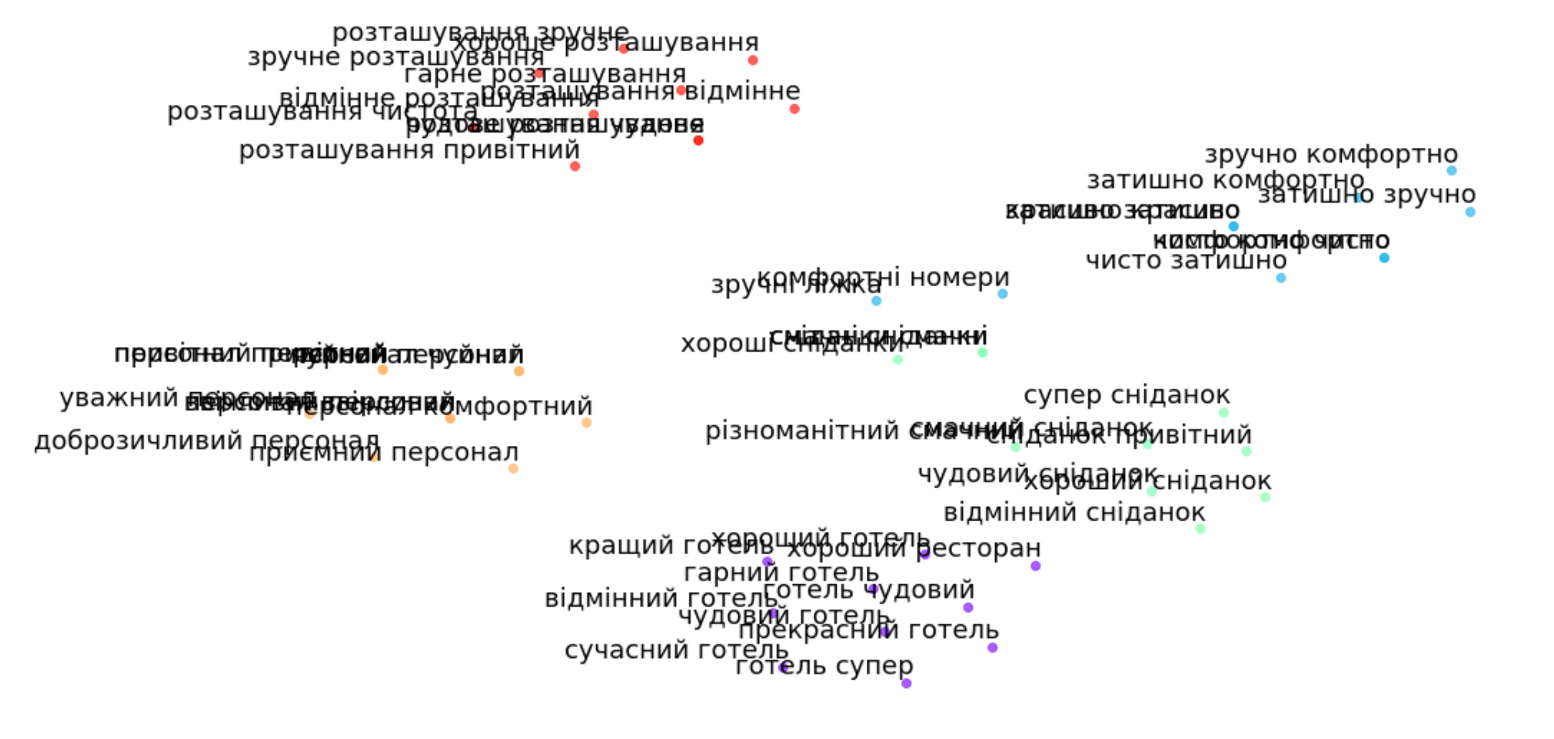

In [78]:
Image("data/cluster_example.png")

### Detect the category of  the cluster | Metric

If we have annotated data for each cluster (see example bellow), which can be impossible in our case, we can compare the detection result with ground truth. The accurancy at this case for one hotel would have the simple primitive formula: <br/>
$acc = \frac{\text{num of macthed categories}}{\text{num of clusters}}$ ,<br>
where *num of macthed categories* - number of clusters where detected category mathced with ground truth <br>
*num of clusters* - number of clusters for this hotel, be aware that each cluster should have unique category. 

As there no such kind of annoted data, we can compare the detection result with another method. For example, let's calculate this accuracy for blum hotel (as we have stub model which genegarte random result 2 different experiments will give us different result).

In [80]:
annotated_cluster = [
    (["—Å–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è —Ü—ñ–Ω–∏"], Category.VALUE_FOR_MONEY),
    (["–ø–µ—Ä—Å–æ–Ω–∞–ª –≤–≤—ñ—á–ª–∏–≤–∏–π", "–ø–µ—Ä—Å–æ–Ω–∞–ª —Ö–æ—Ä–æ—à–∏–π"], Category.STAFF),
    (["—Å—Ç—ñ–Ω–∏ –±—Ä—É–¥–Ω—ñ"], Category.CLEANLINESS),
    (["–∑–≤—É–∫–æ—ñ–∑–æ–ª—è—Ü—ñ—è –ø–æ–≥–∞–Ω–∞", "–≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å —à—É–º–æ—ñ–∑–æ–ª—è—Ü—ñ—ó"], Category.NOISE),
    (["–≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –ª—ñ—Ñ—Ç—É"], Category.COMFORT ),
    (["–ª–æ–∫–∞—Ü—ñ—è —á—É–¥–æ–≤–∞", "—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –≥–∞—Ä–Ω–µ"], Group.LOCATION)
]

In [89]:
categories1 = stub_model.detect_cluster_category(cluster_collocations)
categories1

[<Category.COMFORT: 3>,
 <Category.CLEANLINESS: 2>,
 <Category.VALUE_FOR_MONEY: 4>,
 <Category.WIFI: 7>,
 <Category.CLEANLINESS: 2>]

In [88]:
categories2 = stub_model.detect_cluster_category(cluster_collocations)
categories2

[<Category.COMFORT: 3>,
 <Category.OTHERS: 8>,
 <Category.COMFORT: 3>,
 <Category.NOISE: 6>,
 <Category.COMFORT: 3>]

In [92]:
def calc_categories_match_acc(categories, etalon_categories):
    assert len(categories) == len(etalon_categories)
    size = len(categories)
    if size == 0:
        return None
    num_of_matched = 0
    for i in range(0, size):
        if categories[i] == etalon_categories[i]:
            num_of_matched += 1
    
    return num_of_matched / size
    

In [93]:
blum_category_acc = calc_categories_match_acc(categories2, categories1)
blum_category_acc

0.2

In case if we don't have annotaed ground truth data, it is also make sence to measure Cohen Kappa Score:

In [111]:
cohen_kappa_score(categories2, categories1)

0.09090909090909094

As it is classification problem (classify the category of the cluster) we  are going to  measure **precison**, **recall** and **F1-score** for each category.   

Let's consider the example for 10 hotels. Here we also compare the results between two method assuming that one of them give etalon result (it is just stub to show how metrics would like, in real case there shold be annotated data or another more accurate method ). 

In [99]:
hotels = random.sample(set(example_df['hotel'].values), 10)
hotels

['st-feder.uk.html',
 'coin-l-39-viv.uk.html',
 'edem.uk.html',
 'cisar-bankir.uk.html',
 'mini-freedom-mercurius.uk.html',
 'opera-passage-apartments.uk.html',
 'quot-kraft-quot-butic-apart.uk.html',
 'dd3-4ndud-n-ddud3-4ndud-n.uk.html',
 'fortress.uk.html',
 'viena.uk.html']

In [112]:
result, simulate_etalon_result = [], []
acc_df = {
    'hotel': [],
    'accuracy' : [],
    'cohen_kappa': []
}
for hotel in hotels:
    collocations = stub_model.acquire_collocations_for_hotel(hotel)
    clusters = stub_model.cluster_collocations(collocations, k = 5)
    
    simulate_etalon_categories = stub_model.detect_cluster_category(clusters)
    categories = stub_model.detect_cluster_category(clusters)
    
    acc_df['hotel'].append(hotel)
    acc_df['accuracy'].append(calc_categories_match_acc(categories, simulate_etalon_categories))
    acc_df['cohen_kappa'].append(cohen_kappa_score(categories, simulate_etalon_categories))
    
    simulate_etalon_result += simulate_etalon_categories
    result +=  categories

The accuracy and Cappa Cohen for each hotel are described bellow:

In [115]:
pd.DataFrame(acc_df)

hotel  accuracy  cohen_kappa
0                      39.uk.html       0.0    -0.086957
1       the-lion-s-castle.uk.html       0.2     0.090909
2    lviv-loft-apartments.uk.html       0.4     0.285714
3                   urban.uk.html       0.2     0.090909
4             code-10-viv.uk.html       0.2    -0.111111
5  lviv-loft-construction.uk.html       0.0    -0.086957
6                  george.uk.html       0.0    -0.041667
7                    bank.uk.html       0.2     0.000000
8           apart-antares.uk.html       0.2    -0.052632
9                  nadobu.uk.html       0.4     0.250000

The *Precision*, *Recall* and *F1-score* for each type of categories are presented bellow:

In [117]:
print(classification_report(simulate_etalon_result, result, target_names=[item.__str__() for item in list(Category)]))

                          precision    recall  f1-score   support

          Category.STAFF       0.12      0.33      0.18         3
     Category.FACILITIES       0.17      0.20      0.18         5
    Category.CLEANLINESS       0.25      0.20      0.22         5
        Category.COMFORT       0.12      0.11      0.12         9
Category.VALUE_FOR_MONEY       0.20      0.17      0.18         6
       Category.LOCATION       0.17      0.17      0.17         6
          Category.NOISE       0.00      0.00      0.00         3
           Category.WIFI       0.00      0.00      0.00         7
         Category.OTHERS       0.30      0.50      0.37         6

               micro avg       0.18      0.18      0.18        50
               macro avg       0.15      0.19      0.16        50
            weighted avg       0.15      0.18      0.16        50



To understand which categories are intersected, it is make sence to calculate confusion matrix

In [129]:
confusion_matrix(simulate_etalon_result, result)

array([[1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 0, 0, 1],
       [0, 3, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 3, 2, 0, 1],
       [2, 0, 1, 1, 1, 0, 0, 0, 1],
       [3, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 4],
       [1, 0, 0, 1, 0, 0, 0, 1, 3]])

In [130]:
#TODO: visualize this matrix via plot_confusion_matrix from sklearn

### Determine the sentiment of the collocation cluster

When we have already had clustering collocations, and we know the category of each cluster, so we want to determine the sentiment of each category. 

Assume we have already had annotated sentiments for each categories. As an example for one hotel we have the sentiment for each categories: <br> <br>
STAFF - POSITIVE üôÇ <br>
FACILITIES - NEUTRAL üòê <br>
CLEANLINESS -  NEGATIVE üò£<br>
COMFORT - NEUTRAL üòê<br>
VALUE_FOR_MONEY - POSITIVE üôÇ<br>
LOCATION - POSITIVE üôÇ <br>
NOISE - NEGATIVE üò£<br>
WIFI - NEUTRAL üòê<br>

Here we can use the same approach as we proposed for the metric in determining categories.

First of all, we want to estimate accuracy and Cohen's Kappa for separate hotel.

In [134]:
def calc_sentiment_match_acc(sentiments, etalon_sentiments):
    assert len(sentiments) == len(etalon_sentiments)
    size = len(sentiments)
    if size == 0:
        return None
    num_of_matched = 0
    for i in range(0, size):
        if sentiments[i] == etalon_sentiments[i]:
            num_of_matched += 1
    
    return num_of_matched / size

In [146]:
sentiments1 = stub_model.detect_sentiments_of_categories(cluster_collocations, categories1)
sentiments2 = stub_model.detect_sentiments_of_categories(cluster_collocations, categories2)

In [148]:
blum_sentiment_accuracy = calc_sentiment_match_acc(sentiments2, sentiments1)
print(f"The matcging sentiment accuracy for Blum hotel is: {blum_sentiment_accuracy}")

The matcging sentiment accuracy for Blum hotel is: 0.2


**By the way, sentiment matching depends on categories matching, because firstly we detect categoriy type of the sentiment, after that we detect sentiment type based on previous result.**

As these results can be gotten by different method, it is make sence to calculate agreement between these methods, so the Cohen's Kappa:

In [151]:
cohen_kappa_score(sentiments1, sentiments2)

-0.4285714285714286

As it is also classification problem, we will calculate the  **precison**, **recall** and **F1-score** for each sentiment.   

Let's consider 10 hotels analogically. 

In [153]:
result, simulate_etalon_result = [], []
sent_acc_df = {
    'hotel': [],
    'accuracy' : [],
    'cohen_kappa': []
}
for hotel in hotels:
    collocations = stub_model.acquire_collocations_for_hotel(hotel)
    clusters = stub_model.cluster_collocations(collocations, k = 5)
    
    simulate_etalon_categories = stub_model.detect_cluster_category(clusters)
    categories = stub_model.detect_cluster_category(clusters)
    
    simulate_etalon_sentiments = stub_model.detect_sentiments_of_categories(clusters, simulate_etalon_categories)
    sentiments = stub_model.detect_sentiments_of_categories(clusters, categories)


    
    sent_acc_df['hotel'].append(hotel)
    sent_acc_df['accuracy'].append(calc_sentiment_match_acc(sentiments, simulate_etalon_sentiments))
    sent_acc_df['cohen_kappa'].append(cohen_kappa_score(sentiments, sentiments))
    
    simulate_etalon_result += simulate_etalon_sentiments
    result +=  sentiments

In [157]:
pd.DataFrame(sent_acc_df)

hotel  accuracy  cohen_kappa
0                       39.uk.html       0.0    -0.086957
1        the-lion-s-castle.uk.html       0.2     0.090909
2     lviv-loft-apartments.uk.html       0.4     0.285714
3                    urban.uk.html       0.2     0.090909
4              code-10-viv.uk.html       0.2    -0.111111
5   lviv-loft-construction.uk.html       0.0    -0.086957
6                   george.uk.html       0.0    -0.041667
7                     bank.uk.html       0.2     0.000000
8            apart-antares.uk.html       0.2    -0.052632
9                   nadobu.uk.html       0.4     0.250000
10                      39.uk.html       1.0     1.000000
11       the-lion-s-castle.uk.html       0.2     1.000000
12    lviv-loft-apartments.uk.html       0.2     1.000000
13                   urban.uk.html       0.0     1.000000
14             code-10-viv.uk.html       0.2     1.000000
15  lviv-loft-construction.uk.html       0.4     1.000000
16                  george.uk.html       0.6     1.000000
17                    bank.uk.html       0.2     1.000000
18           apart-antares.uk.html       0.2     1.000000
19                  nadobu.uk.html       0.2     1.000000

The *Precision*, *Recall* and *F1-score* for each type of sentiments are presented bellow:

In [159]:
print(classification_report(simulate_etalon_result, result, target_names=[item.__str__() for item in list(SentimentType)]))

                        precision    recall  f1-score   support

SentimentType.NEGATIVE       0.24      0.25      0.24        16
 SentimentType.NEUTRAL       0.29      0.33      0.31        12
SentimentType.POSITIVE       0.42      0.36      0.39        22

             micro avg       0.32      0.32      0.32        50
             macro avg       0.31      0.32      0.31        50
          weighted avg       0.33      0.32      0.32        50



To understand which sentiments are intersected, it is make sence to calculate confusion matrix:

In [160]:
confusion_matrix(simulate_etalon_result, result)

array([[4, 4, 8],
       [5, 4, 3],
       [8, 6, 8]])

### Generate insight (summary) from the review | Metric 

In [128]:
from rouge import Rouge

As one of the main goal of this project is to generate summary about hotel based on user review comments, we need to evaluate the generated summary result. For summary evaluation, we propose to use ROUGE (Recall-Oriented Understudy for Gisting Evaluation) metric, which is used often for evaluating automatic summarization. <br/>

Lrt's consider one stub example how it is calculated for one hotel. As we know sentiment for each cluster and summary is generated based on this cluster, let's compare summaries for each sentiment separately. 

In [129]:
def calc_rouge_scores(summary, etalon_summary):
    summary_text = ''.join(summary)
    etalon_summary_text = ''.join(etalon_summary)
    
    if summary_text == "":
        summary_text = " "
        
    if etalon_summary_text == "":
        etalon_summary_text = " "
        
    scores = Rouge().get_scores(etalon_summary_text, summary_text)
    
    return scores

In [138]:
summary = stub_model.generate_summary_for_hotel("blum.uk.html")
summary

{<SentimentType.NEGATIVE: 0>: ['–≥–æ—Ç–µ–ª—å —á—É–¥–æ–≤–∏–π',
  '–∑–Ω–∏–∂—É—î—Ç—å—Å—è –≤—ñ–∫–Ω–∞—Ö',
  '—Ç–µ–ø–ª–æ –Ω–æ–º–µ—Ä—ñ',
  '—Ç—É—Ç –≤–∂–µ',
  '–∑–∞–∫—Ä–∏—Ç–∏ —Ä—ñ–≤–µ–Ω—å',
  '–∑–∞–∫—Ä–∏—Ç–∏ —Ä—ñ–≤–µ–Ω—å',
  '—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –ø—Ä–∏–º—ñ—â–µ–Ω–Ω—ñ',
  '–≤—ñ–¥–ø–æ—á–∏–Ω–æ–∫ –≥–∞—Ä–Ω–∏–π',
  '—Ä—ñ–≤–µ–Ω—å —à—É–º—É'],
 <SentimentType.NEUTRAL: 1>: ['—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –Ω–æ–º–µ—Ä—É', '—Å–∫—Ä–∏–ø–ª—è—Ç—å —à—É–º'],
 <SentimentType.POSITIVE: 2>: ['–≤–∏—Å—Ç–∞—á–∞–ª–æ –æ—Å–≤—ñ—Ç–ª–µ–Ω–Ω—è',
  '–≥–æ—Ç–µ–ª—å —á—É–¥–æ–≤–∏–π',
  '–∑–Ω–∏–∂—É—î—Ç—å—Å—è –∑–Ω–∞—á–Ω–æ',
  '–≤—ñ–∫–Ω–∞—Ö –≤—ñ–¥–∫—Ä–∏—Ç–∏—Ö',
  '–ø—Ä–∏–≤—ñ—Ç–Ω–∏–π –¥—É–∂–µ',
  '—á–∏—Ç–∞—Ç–∏ —Å–Ω–æ–º',
  '—Ç—É—Ç —á—É–¥–æ–≤–æ',
  '—Ä–æ–∑—á–∞—Ä—É–≤–∞–Ω–Ω—è –Ω–µ–≤–µ–ª–∏–∫–µ']}

For example, for this hotel we have annotaed summary result:

In [139]:
etalon_summary = {
    SentimentType.NEGATIVE : ['—Ä—ñ–≤–µ–Ω—å —à—É–º—É'],
    SentimentType.NEUTRAL : ["—Ä–æ–∑—Ç–∞—à—É–≤–∞–Ω–Ω—è –∑—Ä—É—á–Ω–µ", '–ø–æ–º–∏—Ç—ñ —è–∫—ñ—Å–Ω–æ'],
    SentimentType.POSITIVE : ['–ø—Ä–∏–≤—ñ—Ç–Ω–∏–π –ø–µ—Ä—Å–æ–Ω–∞–ª', '–≥–æ—Ç–µ–ª—å —á—É–¥–æ–≤–∏–π']
}

In [140]:
rouge_scores_result = dict()
for sentiment in etalon_summary:
    scores = calc_rouge_scores(summary[sentiment], etalon_summary[sentiment])
    rouge_scores_result[sentiment] = scores 
rouge_scores_result

{<SentimentType.NEGATIVE: 0>: [{'rouge-1': {'f': 0.16666666388888893,
    'p': 0.5,
    'r': 0.1},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.16666666388888893, 'p': 0.5, 'r': 0.1}}],
 <SentimentType.NEUTRAL: 1>: [{'rouge-1': {'f': 0.3333333283333334,
    'p': 0.3333333333333333,
    'r': 0.3333333333333333},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.3333333283333334,
    'p': 0.3333333333333333,
    'r': 0.3333333333333333}}],
 <SentimentType.POSITIVE: 2>: [{'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
   'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}]}

ROUGE-1 refers to the overlap of unigram (each word) between the system and reference summaries. <br>
ROUGE-2 refers to the overlap of bigrams between the system and reference summaries. <br>
ROUGE-L: Longest Common Subsequence (LCS)[3] based statistics.  Longest common subsequence problem takes into account sentence level structure similarity naturally and identifies longest co-occurring in sequence n-grams automatically.

This rouge scores are calculated for each hotel where summary is generated. 